# Template Pipeline
Normalisation&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
**X -> Gaussian**  
Imputation 1&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
**Median**  
Outlier Detection&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
**Z Score**  
Imputation 2&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
**Median**  
Feature Selection&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
**Implicit to model**  
Model&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;
**Lasso Regression**


## Imports

In [52]:
# General
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np

# ML
from sklearn.linear_model import LinearRegression, Lasso, LassoCV, BayesianRidge
from sklearn.metrics import r2_score
from sklearn.model_selection import cross_validate
from sklearn.model_selection import train_test_split
from sklearn.impute import SimpleImputer
from sklearn.model_selection import cross_val_score

# Custom
import sys,os
sys.path.append('/home/jovyan/work/AML/Task_1/Solution') # I would like a cleaner solution but works for now
import Components.Imputation as Imputation
import Components.Outlier_Detection_1D as Outlier_Detection_1D
import Components.Outlier_Detection_ND as Outlier_Detection_ND
import Components.Feature_Selection as Feature_Selection
import Components.Normalisation as Normalisation
import Components.data_fetching as data_fetching
import Components.data_observations as data_observations

# CAREFUL:
# If you make changes to a custom module, you have to reload it, i.e rerun this cell
import importlib
importlib.reload(Imputation)
importlib.reload(Outlier_Detection_1D)
importlib.reload(Outlier_Detection_ND)
importlib.reload(Feature_Selection)
importlib.reload(Normalisation)
importlib.reload(data_fetching)
importlib.reload(data_observations)

<module 'Components.data_observations' from '/home/jovyan/work/AML/Task_1/Solution/Components/data_observations.py'>

## Data Cleaning

In [35]:
X, y = data_fetching.get_train_data()

# missing_vals_mask = Imputation.missing_values_mask(X)
# X = Imputation.median(X)
# X = Normalisation.gaussian(X)
# # X = Outlier_Detection_1D.z_score(X)
# X = X.mask(missing_vals_mask) # Re-impute the ones we imputed before
# X = Imputation.mean(X)
# X,y = Outlier_Detection_ND.mahalanobis_distance(X,y)

# missing_vals_mask = Imputation.missing_values_mask(X)
X = Imputation.median(X)
X,y = Outlier_Detection_ND.mahalanobis_distance(X,y)
X = Normalisation.gaussian(X)
X = Outlier_Detection_1D.z_score(X)
# X = X.mask(missing_vals_mask) # Re-impute the ones we imputed before
X = Imputation.mean(X)

x_train, x_test, y_train, y_test = train_test_split(X, y, test_size=0.15, random_state=0)

## Model Training

### Simple

In [39]:
for a in np.linspace(0.3,0.5,20):
    print('\nAlpha: ', a)
    lasso = Lasso(normalize=False, max_iter=1000, alpha=a).fit(x_train, y_train)
    scores = cross_val_score(lasso, x_train, y_train, cv=3, scoring='r2')
    print(scores.mean())
    # print('Train Score:')
    # y_pred_train = lasso.predict(x_train)
    # train_score = r2_score(y_train, y_pred_train)
    # print(train_score)

    # print('Test Score')
    # y_pred_test = lasso.predict(x_test)
    # test_score = r2_score(y_test, y_pred_test)
    # print(test_score)


Alpha:  0.3
0.4516124408673908

Alpha:  0.31052631578947365
0.45274347751831884

Alpha:  0.32105263157894737
0.4536335723496472

Alpha:  0.33157894736842103
0.45415864365558073

Alpha:  0.34210526315789475
0.4542869945132894

Alpha:  0.3526315789473684
0.45441212076147824

Alpha:  0.3631578947368421
0.45438481079213466

Alpha:  0.3736842105263158
0.4544501248537625

Alpha:  0.38421052631578945
0.4544401338251265

Alpha:  0.39473684210526316
0.4543479728393736

Alpha:  0.4052631578947368
0.45414078703551447

Alpha:  0.4157894736842105
0.4538523763272857

Alpha:  0.4263157894736842
0.4534934528420087

Alpha:  0.4368421052631579
0.4531803286830305

Alpha:  0.4473684210526315
0.45291520190918727

Alpha:  0.45789473684210524
0.45254350254342085

Alpha:  0.46842105263157896
0.45195029640059553

Alpha:  0.4789473684210526
0.45130748147448946

Alpha:  0.4894736842105263
0.45052185062848443

Alpha:  0.5
0.44971147261713673


In [40]:
lasso = Lasso(normalize=False, max_iter=1000, alpha=0.35).fit(x_train, y_train)
# lasso = LassoCV(cv=5, random_state=0).fit(x_train, y_train)

print('Train Score:')
y_pred_train = lasso.predict(x_train)
train_score = r2_score(y_train, y_pred_train)
print(train_score)

print('Test Score')
y_pred_test = lasso.predict(x_test)
test_score = r2_score(y_test, y_pred_test)
print(test_score)

Train Score:
0.5277352163386284
Test Score
0.47087343207683063


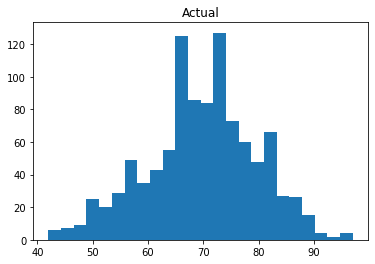

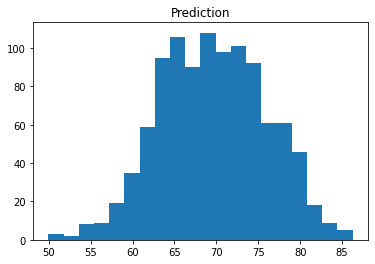

In [41]:
plt.hist(y_train.iloc[:,0].to_numpy(), bins='auto')
plt.title('Actual')
plt.show()

plt.hist(y_pred_train, bins='auto')
plt.title('Prediction')
plt.show()

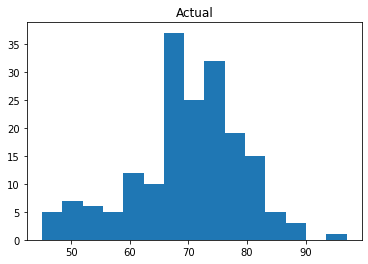

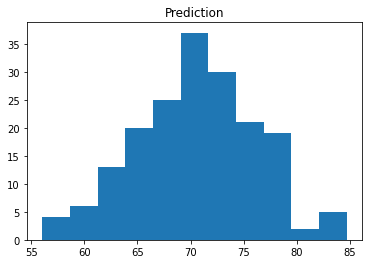

In [42]:
plt.hist(y_test.iloc[:,0].to_numpy(), bins='auto')
plt.title('Actual')
plt.show()

plt.hist(y_pred_test, bins='auto')
plt.title('Prediction')
plt.show()

## Final Prediction

           y
0  71.727055
1  77.304738
2  64.576322
3  65.433166
4  76.214488


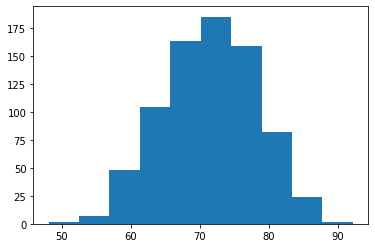

In [54]:
lasso_final = Lasso(normalize=False, max_iter=1000, alpha=0.35).fit(X, y)
# lasso_final = LassoCV(cv=5, random_state=0).fit(X, y)
x_test = data_fetching.get_test_data()

x_test = Imputation.mean(x_test)
x_test = Normalisation.gaussian(x_test)

# Note: They said no outliers were introduced in x_test so no need to perform outlier detection
y_pred = lasso_final.predict(x_test)
plt.hist(y_pred)

y_pred_pd = pd.DataFrame(data=y_pred, columns=["y"])
print(y_pred_pd.head())
y_pred_pd.to_csv('../../Predictions/not_too_good_to_be_true.csv', index_label='Id')